Import Library Yang Digunakan

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from matplotlib.colors import ListedColormap

Import Dataset

In [25]:
dataset = pd.read_csv('customer.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

Splitting The Dataset Into The Training Set And Test Set

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

Feature Scaling

In [27]:
x = dataset.iloc[:, [2, 3]]
y = dataset.iloc[:, -1].values
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0]),
                                     ('scaler', StandardScaler(), [1])],
                       remainder='passthrough')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

Training The Naive Bayes Model On The Training Set

In [28]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

Predicting The Test Set Results

In [29]:
y_pred = classifier.predict(x_test)

Making The Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[179   0]
 [ 71   0]]


Visualising The Training Set Results

<ipython-input-31-05e61ac28207>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


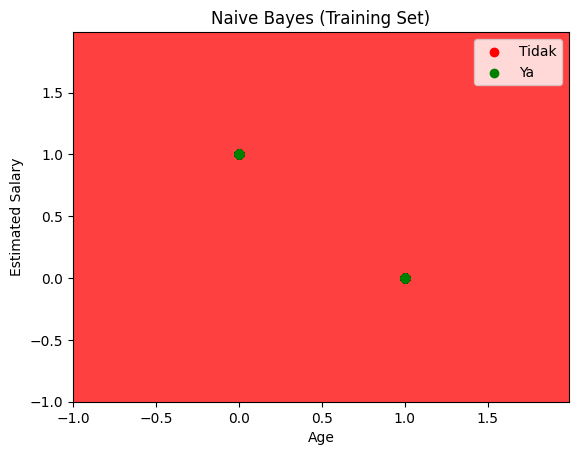

In [31]:
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
x3 = np.zeros_like(x1)
X_grid = np.array([x1.ravel(), x2.ravel(), x3.ravel()]).T

predictions = classifier.predict(X_grid)
numeric_predictions = np.where(predictions == 'Tidak', 0, 1)
plt.contourf(x1, x2, numeric_predictions.reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()